/home/yuanbing/anaconda3/envs/py310/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/yuanbing/anaconda3/envs/py310/lib/python3.10/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


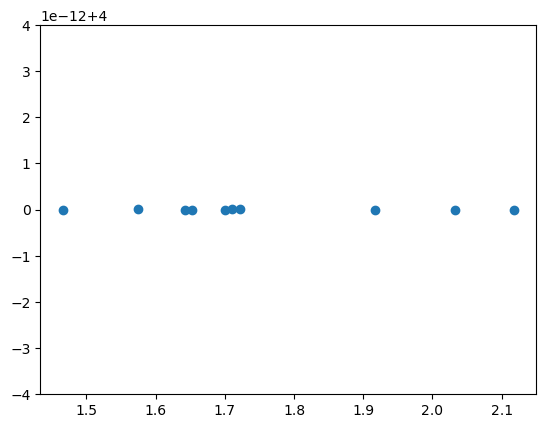

In [4]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from q_funcs import quantum_EI, generate_kraus_operators, kraus_to_transfer_matrix
from q_funcs import generate_depolarizing_kraus_operators, tpm_ei


np.random.seed(42)
n = 4
k = 2
sample = 10
eigs_ls = []
sing_ls = []
for s in range(sample):
    kraus_operators = generate_kraus_operators(n, k)
    k_list = [kraus_operators[:,:,i] for i in range(k)]
    eigs = 0
    for mat in k_list:
        mm = np.dot(mat, mat.T.conj())
        #U, singular_kra, V = np.linalg.svd(mm, full_matrices=False)
        eigenvalues, eigenvectors = np.linalg.eig(mm)
        eigs += np.sum(eigenvalues)
    eigs_ls.append(eigs)
    P = kraus_to_transfer_matrix(k_list)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_ls.append(np.sum(singular))
    
plt.scatter(sing_ls, eigs_ls)

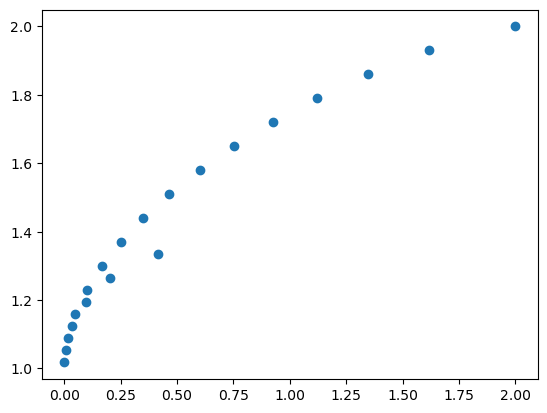

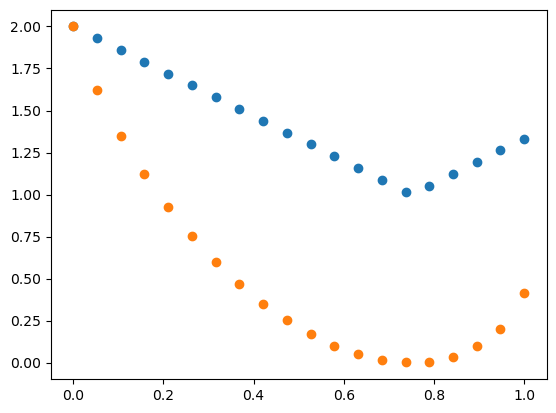

In [2]:
sing_ls = []
EI_ls = []
for p in np.linspace(0,1,20):
    kraus_ls = generate_depolarizing_kraus_operators(p)
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_ls.append(np.sum(singular))
    EI_ls.append(quantum_EI(kraus_ls, 2))


plt.scatter(EI_ls, sing_ls)
plt.figure()
plt.scatter(np.linspace(0,1,20), sing_ls)
plt.scatter(np.linspace(0,1,20), EI_ls)

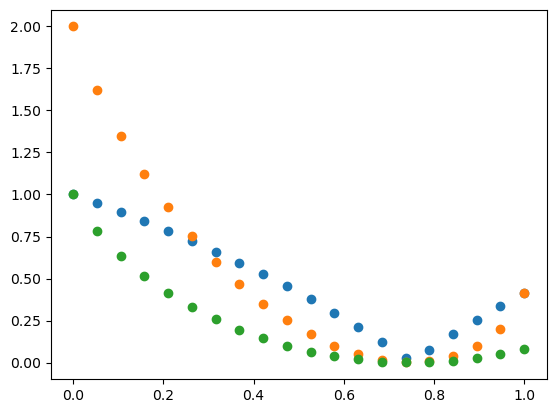

In [5]:
sing_ls = []
EI_ls = []
EI_P_ls = []
for p in np.linspace(0,1,20):
    kraus_ls = generate_depolarizing_kraus_operators(p)
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_pro = np.log2(np.sum(singular))
    sing_ls.append(sing_pro)
    EI_ls.append(quantum_EI(kraus_ls, 2))
    EI_P_ls.append(tpm_ei(P))


#plt.scatter(EI_ls, sing_ls)
plt.figure()
plt.scatter(np.linspace(0,1,20), sing_ls)
plt.scatter(np.linspace(0,1,20), EI_ls)
plt.scatter(np.linspace(0,1,20), EI_P_ls)

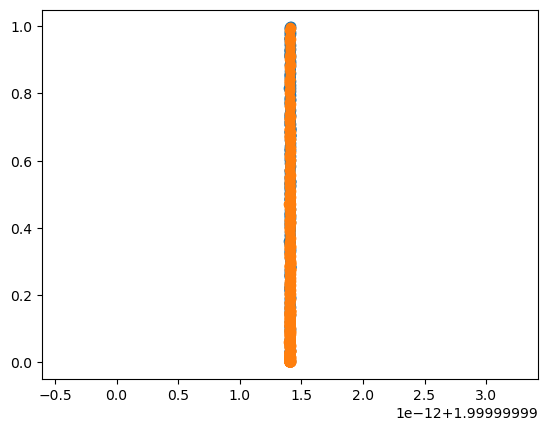

In [9]:
np.random.seed(42)
n = 1
k = 1
sample = 1000
sing_ls = []
EI_ls = []
EI_P_ls = []
for s in range(sample):
    kraus_operators = generate_kraus_operators(2**n, k)
    kraus_ls = [kraus_operators[:,:,i] for i in range(k)]
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_pro = np.log2(np.sum(singular))
    sing_ls.append(sing_pro)
    EI_ls.append(quantum_EI(kraus_ls, 2*n))
    EI_P_ls.append(tpm_ei(P))
    
plt.figure()
plt.scatter(EI_ls, sing_ls)
plt.scatter(EI_ls, EI_P_ls)